# Los Angeles Crime Data Analysis
## The goal of this project is to analyze crime data for the city of Los Angeles from 2020-2023.
### Source of data: https://catalog.data.gov/dataset/crime-data-from-2020-to-present
### Data dictionary: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

# Install Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load and Clean Data

In [3]:
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [4]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784206 entries, 0 to 784205
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           784206 non-null  int64  
 1   Date Rptd       784206 non-null  object 
 2   DATE OCC        784206 non-null  object 
 3   TIME OCC        784206 non-null  int64  
 4   AREA            784206 non-null  int64  
 5   AREA NAME       784206 non-null  object 
 6   Rpt Dist No     784206 non-null  int64  
 7   Part 1-2        784206 non-null  int64  
 8   Crm Cd          784206 non-null  int64  
 9   Crm Cd Desc     784206 non-null  object 
 10  Mocodes         676205 non-null  object 
 11  Vict Age        784206 non-null  int64  
 12  Vict Sex        681365 non-null  object 
 13  Vict Descent    681357 non-null  object 
 14  Premis Cd       784197 non-null  float64
 15  Premis Desc     783740 non-null  object 
 16  Weapon Used Cd  272750 non-null  float64
 17  Weapon Des

In [6]:
# Convert date variables to date type
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

In [7]:
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
DR_NO,int64
Date Rptd,datetime64[ns]
DATE OCC,datetime64[ns]
TIME OCC,int64
AREA,int64
AREA NAME,object
Rpt Dist No,int64
Part 1-2,int64
Crm Cd,int64


In [8]:
# Check for null values
pd.DataFrame(data.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0


# Data Analysis and Visualization

## Which areas have the most crimes reported?

In [9]:
top_neighbourhood = pd.DataFrame(data['AREA NAME'].value_counts()).rename({"AREA NAME":"Case Reported"}, axis = 1).rename_axis("Area")

top_neighbourhood.style.bar()

,Case Reported
Area,
Central,52662
77th Street,49641
Pacific,45857
Southwest,43836
Hollywood,41661
Southeast,40132
Olympic,39708
Newton,39133
N Hollywood,38980


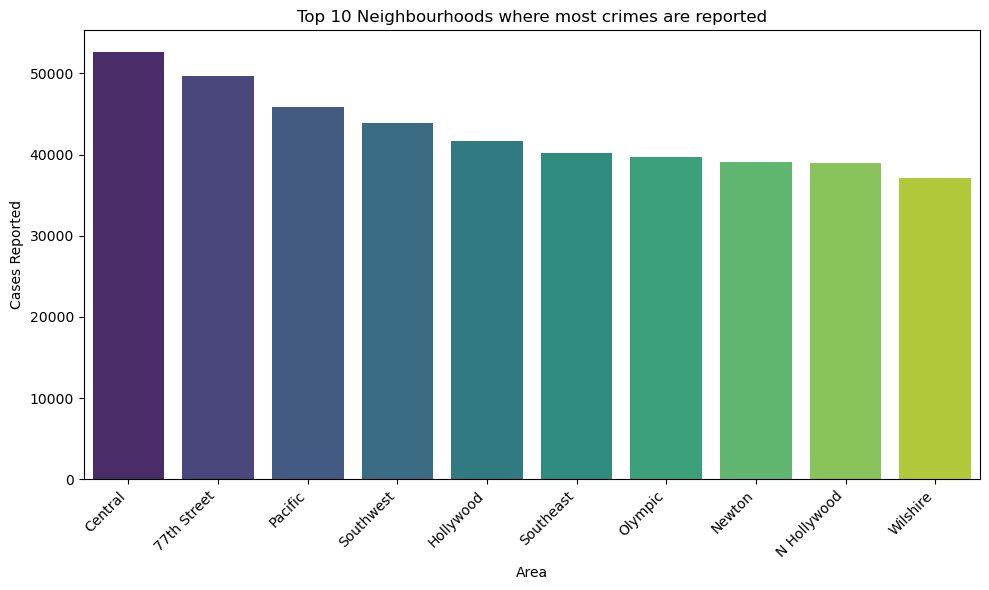

In [10]:
top_neighbourhood = top_neighbourhood.sort_values(by='Case Reported', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_neighbourhood, x=top_neighbourhood.index, y='Case Reported', palette='viridis')

plt.xlabel('Area')
plt.ylabel('Cases Reported')
plt.title('Top 10 Neighbourhoods where most crimes are reported')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

## What are the most frequently reported crimes?

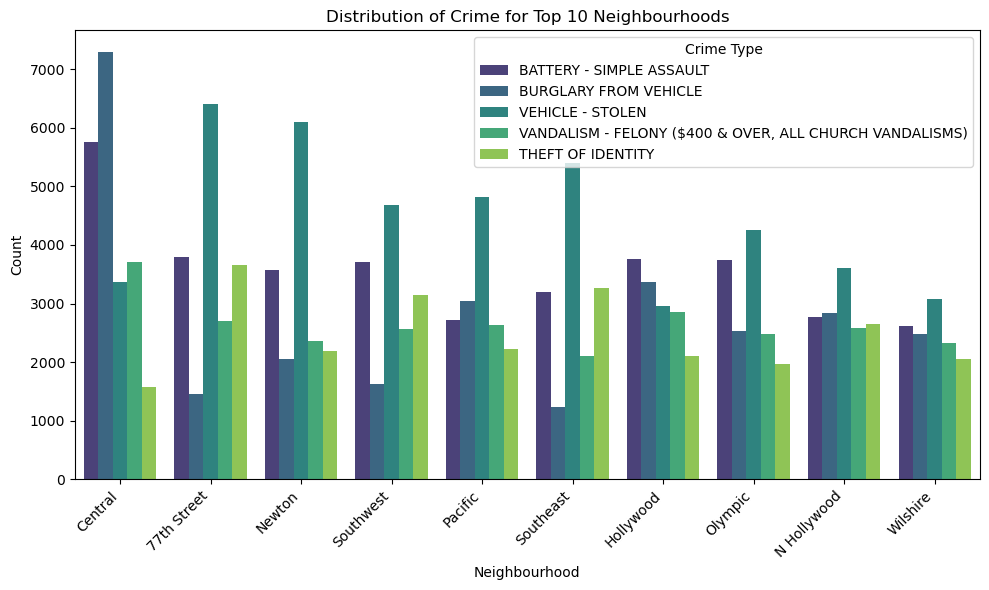

In [11]:
# Calculate the top 10 neighbourhoods with highest crime rate
top_neighbourhoods = data['AREA NAME'].value_counts().head(10).index

# Calculate the top 5 most frequent crimes
top_crimes = data['Crm Cd Desc'].value_counts().head(5).index

# Filter the data to include only the top 10 neighbourhoods and top 10 crimes
data_top_neighbourhoods = data[data['AREA NAME'].isin(top_neighbourhoods)]

data_top_neighbourhoods = data_top_neighbourhoods[data_top_neighbourhoods['Crm Cd Desc'].isin(top_crimes)]

# Get the order of neighborhoods by crime count in descending order
neighbourhood_order = data_top_neighbourhoods.groupby('AREA NAME')['Crm Cd Desc'].count().sort_values(ascending=False).index

# Create a count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data_top_neighbourhoods, x='AREA NAME', hue='Crm Cd Desc', palette='viridis', order=neighbourhood_order)

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Crime for Top 10 Neighbourhoods')
plt.legend(title='Crime Type')

# Slightly rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

## How many crimes were reported each year?

In [12]:
data['year'] = pd.to_datetime(data['Date Rptd']).dt.year

pd.DataFrame(data['year'].value_counts()).rename({"year":"Case Reported"}, axis = 1).rename_axis("Year")

,Case Reported
Year,
2022,235076
2021,208284
2020,192702
2023,148144


## What are the general trends in the reported crimes between 2021-2023?

### What are the trends in the top five most frequently reported crimes?

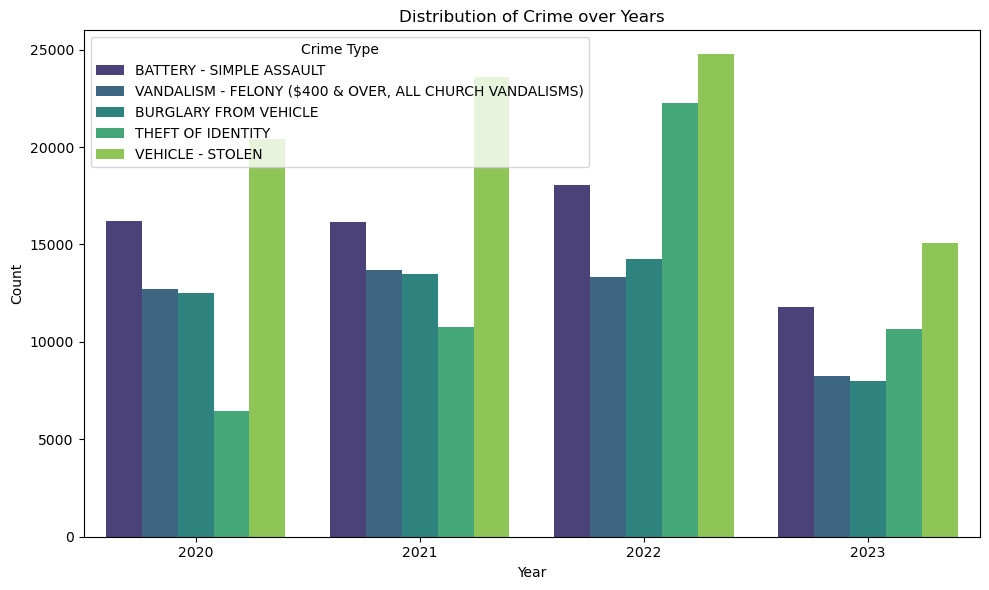

In [13]:
plt.figure(figsize=(10, 6))
top_crimes = data['Crm Cd Desc'].value_counts().head(5).index
data_top_crimes = data[data['Crm Cd Desc'].isin(top_crimes)]
sns.countplot(data=data_top_crimes, x='year', hue='Crm Cd Desc', palette='viridis')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Crime over Years')
plt.legend(title='Crime Type')

# Display the plot
plt.tight_layout()
plt.show()

### Did crime rates increase or decrease?

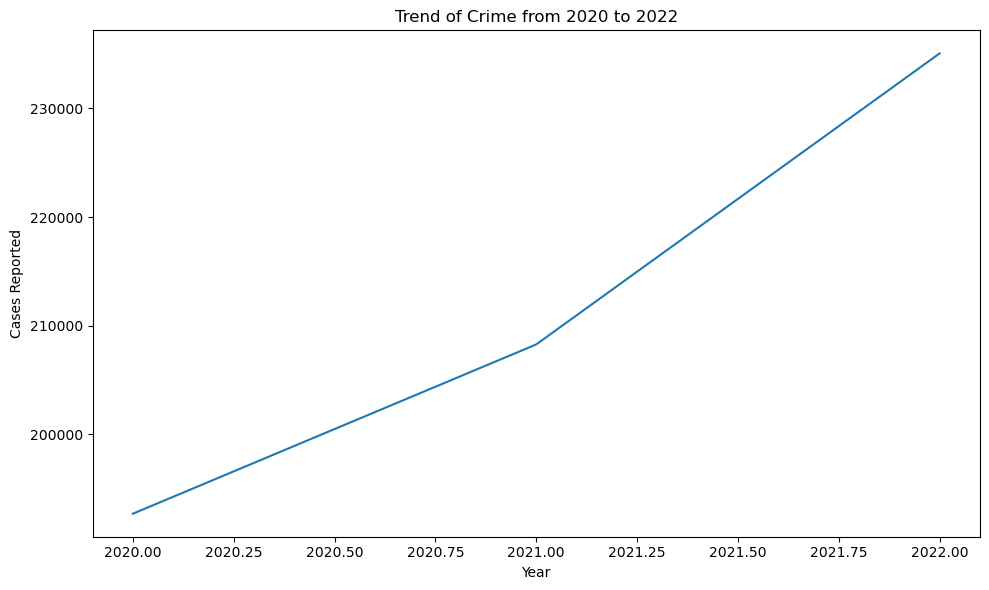

In [14]:
data_pre_2023 = data[data['year'] != 2023]

# Calculate the year-wise trend of crime rates
year_wise_trend = pd.DataFrame(data_pre_2023['year'].value_counts()).rename({"year":"Case Reported"}, axis = 1).rename_axis("Year")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_wise_trend, x=year_wise_trend.index, y='Case Reported')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cases Reported')
plt.title('Trend of Crime from 2020 to 2022')

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
data_pre_2023.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020


### On what days and months are a higher number of crimes reported?

In [16]:
data['Month'] = data['DATE OCC'].apply(lambda time: time.month)
data['Day of Week'] = data['DATE OCC'].apply(lambda time: time.dayofweek)

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

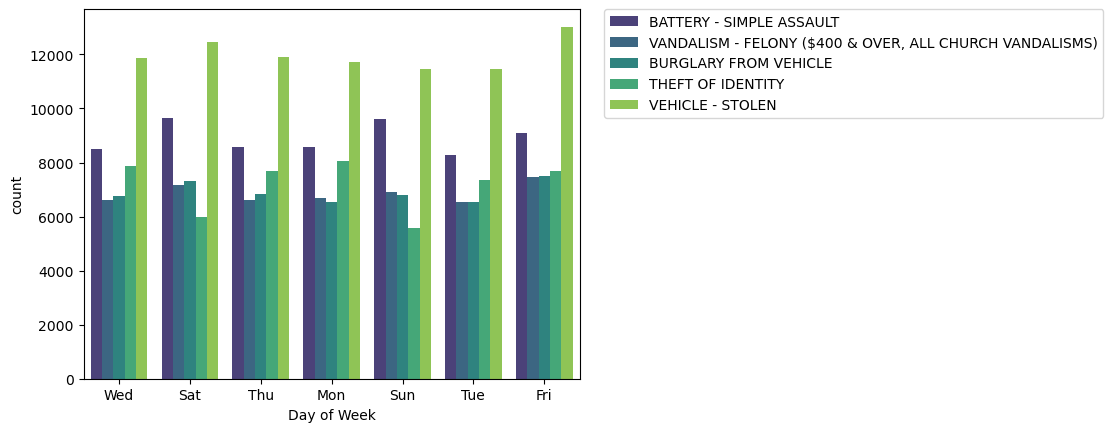

In [18]:
data_top_crimes = data[data['Crm Cd Desc'].isin(top_crimes)]
sns.countplot(x='Day of Week',data=data_top_crimes,hue='Crm Cd Desc',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

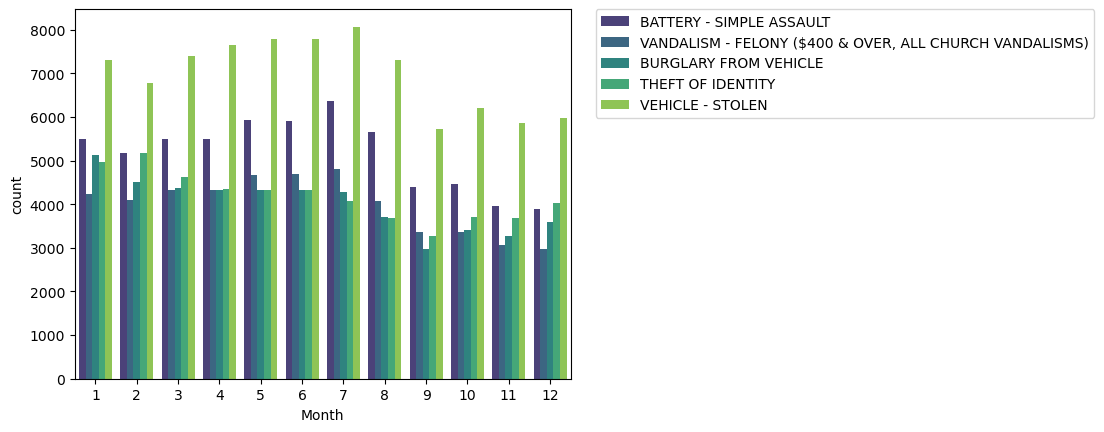

In [19]:
sns.countplot(x='Month', data=data_top_crimes, hue='Crm Cd Desc', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### What is the overall correlation between the time of year and the reported number of crimes between 2020-2022?

In [20]:
#correlation between days/months

data_pre_2023 = data[data['year'] != 2023]

dayMonth = data_pre_2023.groupby(by=['Day of Week', 'Month']).count()['Crm Cd Desc'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,8753,7422,7012,8482,7940,7772,9506,7397,8210,9066,7106,8407
Mon,7330,7016,7763,6945,8319,7897,6998,8940,6863,7521,8084,6329
Sat,8033,7845,6603,7687,8557,7119,8686,8011,7199,9378,6821,7249
Sun,7525,6970,7067,6855,8630,7002,7715,8107,6959,8304,7268,6163
Thu,7197,6811,7134,7828,6768,7803,8154,6919,8213,7580,6804,8355


<Axes: xlabel='Month', ylabel='Day of Week'>

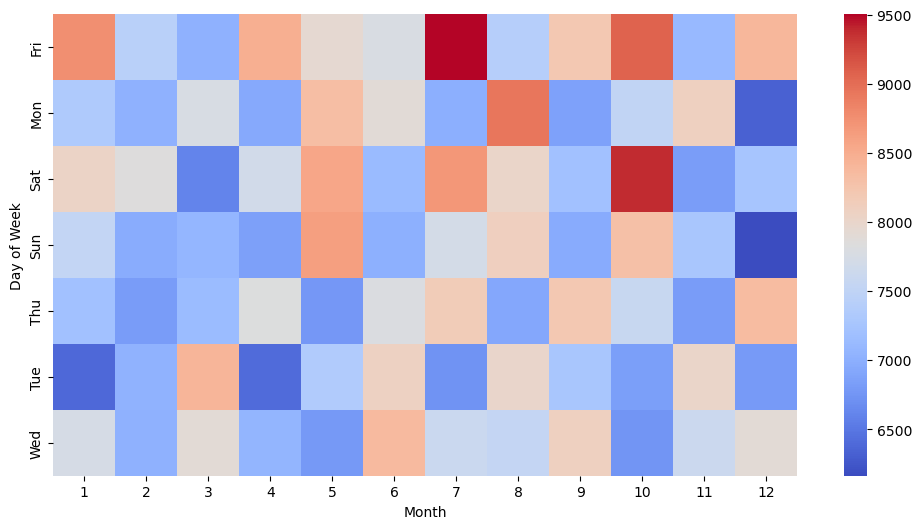

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

## 2020 - 2023 Crime Data Analysis Final Results
#### Neighbourhoods with highest number of reported crimes:
#### 1. Central 
#### 2. 77th Street 
#### 3. Pacific 
#### 4. Southwest 
#### 5. Hollywood 

#### Fridays have the highest number of reported crimes, followed by Monday and Saturday. 
#### July is the month with most number of reported crimes, followed by June and May. 
#### Battery - simple assaults are the most reported crime, followed by vandalism and burgalry from vehicle. 
#### Excluding 2023, 2022 had the highest crime rate (235,076 cases), and 2020 the lowest (192,702 cases).
#### Overall, crime reports increased every year from 2020 to 2022.